# Auto Pull Crypto Data With Coin Market Cap API

## Pull Crypto Data

In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Pull 10 Crypto Data
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'10',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'bdcf212b-436f-4228-8115-a92e938c6998',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-04-29T15:16:35.425Z', 'error_code': 0, 'error_message': None, 'elapsed': 28, 'credit_count': 1, 'notice': None, 'total_count': 9433}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10196, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [3]:
type(data)

dict

In [4]:
#Removing limitation for max column
pd.set_option('display.max_columns', None)

In [5]:
#This normalize the data and make it pretty in dataframes
df = pd.json_normalize(data['data'])
#Adding timestamp column to data frame
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10196,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.935935e+07,1.935935e+07,False,NaN,1,None,None,None,2023-04-29T15:15:00.000Z,29332.936120,1.209205e+10,-46.7784,-0.155106,1.053699,6.893752,3.138690,25.089792,24.694085,5.678666e+11,46.9492,6.159917e+11,None,2023-04-29T15:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-29 22:16:38.534118
1,1027,Ethereum,ETH,ethereum,6802,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204062e+08,1.204062e+08,False,NaN,2,None,None,None,2023-04-29T15:15:00.000Z,1910.088601,5.396492e+09,-50.4933,-0.172270,1.757345,2.529273,6.488092,16.780454,18.326088,2.299865e+11,19.0150,2.299865e+11,None,2023-04-29T15:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-29 22:16:38.534118
2,825,Tether,USDT,tether,52294,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.169812e+10,8.509064e+10,False,NaN,3,None,None,None,2023-04-29T15:15:00.000Z,1.000670,1.859004e+10,-42.5419,-0.002340,0.028315,0.043870,0.062509,0.051042,0.046943,8.175283e+10,6.7590,8.514762e+10,None,2023-04-29T15:15:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-29 22:16:38.534118
3,1839,BNB,BNB,bnb,1303,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558629e+08,1.558629e+08,False,NaN,4,None,None,None,2023-04-29T15:15:00.000Z,323.266879,5.681776e+08,-49.5690,-0.221158,0.565592,-1.649749,2.146898,6.428526,1.295291,5.038533e+10,4.1658,5.038533e+10,None,2023-04-29T15:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-29 22:16:38.534118
4,3408,USD Coin,USDC,usd-coin,12088,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.051015e+10,3.051015e+10,False,NaN,5,None,None,None,2023-04-29T15:15:00.000Z,1.000058,2.919023e+09,-37.5962,0.007675,0.006787,-0.010110,0.030447,0.011528,0.003716,3.051192e+10,2.5226,3.051192e+10,None,2023-04-29T15:15:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-29 22:16:38.534118
5,52,XRP,XRP,xrp,940,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.175081e+10,9.998900e+10,False,NaN,6,None,None,None,2023-04-29T15:15:00.000Z,0.480435,7.472736e+08,-53.6577,-0.197034,2.633151,2.049220,-11.280367,27.221689,16.444674,2.486291e+10,2.0556,4.804351e+10,None,2023-04-29T15:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-29 22:16:38.534118
6,2010,Cardano,ADA,cardano,774,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.480714e+10,3.572784e+10,False,NaN,7,None,None,None,2023-04-29T15:15:00.000Z,0.406457,1.620621e+08,-49.1872,0.066526,1.455235,2.552121,7.441507,12.403601,4.310448,1.414760e+10,1.1697,1.829056e+10,None,2023-04-29T15:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-29 22:16:38.534118
7,74,Dogecoin,DOGE,dogecoin,698,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.391390e+11,1.391390e+11,False,NaN,8,None,None,None,2023-04-29T15:15:00.000Z,0.081216,2.419274e+08,-21.6587,-0.072742,1.907586,1.416291,8.332954,-0.683438,-9.954381,1.130028e+10,0.9343,1.130028e+10,None,2023-04-29T15:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-29 22:16:38.534118
8,3890,Polygon,MATIC,polygon,679,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg.

## Make Automation for Pull Data Using For Loop

In [6]:
# Make function to Pull data then write to csv file
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
    'start':'1',
    'limit':'10',
    'convert':'USD'
    }
    headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': 'bdcf212b-436f-4228-8115-a92e938c6998',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
    
    # This normalize the data and make it pretty in dataframes
    df=pd.json_normalize(data['data'])
    # Adding timestamp column to data frame  
    df['timestamp'] = pd.to_datetime('now')    
    df

    if not os.path .isfile(r'C:\Users\Fathin Afif\Downloads\project_file\Python\Projects\Using Public API and Automate it\Upload\Crypto_Dataset.csv'):
        df.to_csv(r'C:\Users\Fathin Afif\Downloads\project_file\Python\Projects\Using Public API and Automate it\Upload\Crypto_Dataset.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\Fathin Afif\Downloads\project_file\Python\Projects\Using Public API and Automate it\Upload\Crypto_Dataset.csv', mode='a', header=False)

In [7]:
# Looping for Running Function every 60 seconds

import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner success')
    sleep(60)
exit()

{'status': {'timestamp': '2023-04-29T15:16:50.566Z', 'error_code': 0, 'error_message': None, 'elapsed': 17, 'credit_count': 1, 'notice': None, 'total_count': 9433}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10196, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [9]:
# Read csv using Pandas
df = pd.read_csv(r'C:\Users\Fathin Afif\Downloads\project_file\Python\Projects\Using Public API and Automate it\Upload\Crypto_Dataset.csv')
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10196,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.935935e+07,1.935935e+07,False,NaN,1,NaN,NaN,NaN,2023-04-29T15:15:00.000Z,29332.936120,1.209205e+10,-46.7784,-0.155106,1.053699,6.893752,3.138690,25.089792,24.694085,5.678666e+11,46.9492,6.159917e+11,NaN,2023-04-29T15:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-29 22:16:48.976552
1,1,1027,Ethereum,ETH,ethereum,6802,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.204062e+08,1.204062e+08,False,NaN,2,NaN,NaN,NaN,2023-04-29T15:15:00.000Z,1910.088601,5.396492e+09,-50.4933,-0.172270,1.757345,2.529273,6.488092,16.780454,18.326088,2.299865e+11,19.0150,2.299865e+11,NaN,2023-04-29T15:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-29 22:16:48.976552
2,2,825,Tether,USDT,tether,52294,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.169812e+10,8.509064e+10,False,NaN,3,NaN,NaN,NaN,2023-04-29T15:15:00.000Z,1.000670,1.859004e+10,-42.5419,-0.002340,0.028315,0.043870,0.062509,0.051042,0.046943,8.175283e+10,6.7590,8.514762e+10,NaN,2023-04-29T15:15:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-29 22:16:48.976552
3,3,1839,BNB,BNB,bnb,1303,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.558629e+08,1.558629e+08,False,NaN,4,NaN,NaN,NaN,2023-04-29T15:15:00.000Z,323.266879,5.681776e+08,-49.5690,-0.221158,0.565592,-1.649749,2.146898,6.428526,1.295291,5.038533e+10,4.1658,5.038533e+10,NaN,2023-04-29T15:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-29 22:16:48.976552
4,4,3408,USD Coin,USDC,usd-coin,12088,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.051015e+10,3.051015e+10,False,NaN,5,NaN,NaN,NaN,2023-04-29T15:15:00.000Z,1.000058,2.919023e+09,-37.5962,0.007675,0.006787,-0.010110,0.030447,0.011528,0.003716,3.051192e+10,2.5226,3.051192e+10,NaN,2023-04-29T15:15:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-29 22:16:48.976552
5,5,52,XRP,XRP,xrp,940,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.175081e+10,9.998900e+10,False,NaN,6,NaN,NaN,NaN,2023-04-29T15:15:00.000Z,0.480435,7.472736e+08,-53.6577,-0.197034,2.633151,2.049220,-11.280367,27.221689,16.444674,2.486291e+10,2.0556,4.804351e+10,NaN,2023-04-29T15:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-29 22:16:48.976552
6,6,2010,Cardano,ADA,cardano,774,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.480714e+10,3.572784e+10,False,NaN,7,NaN,NaN,NaN,2023-04-29T15:15:00.000Z,0.406457,1.620621e+08,-49.1872,0.066526,1.455235,2.552121,7.441507,12.403601,4.310448,1.414760e+10,1.1697,1.829056e+10,NaN,2023-04-29T15:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-29 22:16:48.976552
7,7,74,Dogecoin,DOGE,dogecoin,698,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.391390e+11,1.391390e+11,False,NaN,8,NaN,NaN,NaN,2023-04-29T15:15:00.000Z,0.081216,2.419274e+08,-21.6587,-0.072742,1.907586,1.416291,8.332954,-0.683438,-9.954381,1.130028e+10,0.9343,1.130028e+10,NaN,2023-04-29T15:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-29 22:16:48.976552
8,8,3890,Polygon,MATIC,polygon,679,2019-04-28T00:00:00.000Z,"['platform', 'enterprise-solutions', 'zero-kno..."

## Cleaning the Data

In [10]:
# Display float number with 5 number behind comma
pd.set_option('display.float_format',lambda x: '%5f' % x)
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10196,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.000000,19359350.000000,19359350.000000,False,NaN,1,NaN,NaN,NaN,2023-04-29T15:15:00.000Z,29332.936120,12092048464.572355,-46.778400,-0.155106,1.053699,6.893752,3.138690,25.089792,24.694085,567866576877.434326,46.949200,615991658522.939941,NaN,2023-04-29T15:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-29 22:16:48.976552
1,1,1027,Ethereum,ETH,ethereum,6802,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120406200.076910,120406200.076910,False,NaN,2,NaN,NaN,NaN,2023-04-29T15:15:00.000Z,1910.088601,5396491972.128939,-50.493300,-0.172270,1.757345,2.529273,6.488092,16.780454,18.326088,229986510290.144867,19.015000,229986510290.140015,NaN,2023-04-29T15:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-29 22:16:48.976552
2,2,825,Tether,USDT,tether,52294,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,81698117583.087646,85090638896.270859,False,NaN,3,NaN,NaN,NaN,2023-04-29T15:15:00.000Z,1.000670,18590044815.145973,-42.541900,-0.002340,0.028315,0.043870,0.062509,0.051042,0.046943,81752830238.460922,6.759000,85147623499.330002,NaN,2023-04-29T15:15:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-29 22:16:48.976552
3,3,1839,BNB,BNB,bnb,1303,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,155862940.489779,155862940.489779,False,NaN,4,NaN,NaN,NaN,2023-04-29T15:15:00.000Z,323.266879,568177564.224817,-49.569000,-0.221158,0.565592,-1.649749,2.146898,6.428526,1.295291,50385326324.987785,4.165800,50385326324.989998,NaN,2023-04-29T15:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-29 22:16:48.976552
4,4,3408,USD Coin,USDC,usd-coin,12088,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,30510153410.884678,30510153410.884678,False,NaN,5,NaN,NaN,NaN,2023-04-29T15:15:00.000Z,1.000058,2919023437.341986,-37.596200,0.007675,0.006787,-0.010110,0.030447,0.011528,0.003716,30511917210.574905,2.522600,30511917210.570000,NaN,2023-04-29T15:15:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-29 22:16:48.976552
5,5,52,XRP,XRP,xrp,940,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.000000,51750810378.000000,99988998998.000000,False,NaN,6,NaN,NaN,NaN,2023-04-29T15:15:00.000Z,0.480435,747273608.923470,-53.657700,-0.197034,2.633151,2.049220,-11.280367,27.221689,16.444674,24862907333.966679,2.055600,48043513043.300003,NaN,2023-04-29T15:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-29 22:16:48.976552
6,6,2010,Cardano,ADA,cardano,774,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.000000,34807140884.863998,35727842284.508003,False,NaN,7,NaN,NaN,NaN,2023-04-29T15:15:00.000Z,0.406457,162062125.474770,-49.187200,0.066526,1.455235,2.552121,7.441507,12.403601,4.310448,14147598646.829052,1.169700,18290555412.560001,NaN,2023-04-29T15:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-29 22:16:48.976552
7,7,74,Dogecoin,DOGE,dogecoin,698,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,139139046383.705261,139139046383.705261,False,NaN,8,NaN,NaN,NaN,2023-04-29T15:15:00.000Z,0.081216,241927363.221282,-21.658700,-0.072742,1

In [11]:
# Grouping the data
df = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.130449,1.020017,6.917703,3.159996,25.062356,24.721551
Ethereum,-0.149384,1.694477,2.569278,6.519157,16.791627,18.363639
Tether,-0.012348,0.030723,0.026853,0.052333,0.042791,0.037419
BNB,-0.231608,0.560726,-1.683965,2.150690,6.448082,1.292037
USD Coin,0.000504,0.008656,-0.022556,0.023422,-0.000635,-0.003749
XRP,-0.218105,2.684442,2.058231,-11.227894,27.221825,16.432445
Cardano,0.064877,1.498840,2.507035,7.494900,12.389702,4.309223
Dogecoin,-0.064480,1.928215,1.380862,8.362590,-0.693007,-9.910413
Polygon,0.063125,3.056162,-0.028413,-8.197460,-17.267806,-13.922212


In [12]:
# Convert to stacking data
stack_df = df.stack()
stack_df

name                                  
Bitcoin   quote.USD.percent_change_1h     -0.130449
          quote.USD.percent_change_24h     1.020017
          quote.USD.percent_change_7d      6.917703
          quote.USD.percent_change_30d     3.159996
          quote.USD.percent_change_60d    25.062356
          quote.USD.percent_change_90d    24.721551
Ethereum  quote.USD.percent_change_1h     -0.149384
          quote.USD.percent_change_24h     1.694477
          quote.USD.percent_change_7d      2.569278
          quote.USD.percent_change_30d     6.519157
          quote.USD.percent_change_60d    16.791627
          quote.USD.percent_change_90d    18.363639
Tether    quote.USD.percent_change_1h     -0.012348
          quote.USD.percent_change_24h     0.030723
          quote.USD.percent_change_7d      0.026853
          quote.USD.percent_change_30d     0.052333
          quote.USD.percent_change_60d     0.042791
          quote.USD.percent_change_90d     0.037419
BNB       quote.USD.perce

In [13]:
type(stack_df)

pandas.core.series.Series

In [14]:
#convert to dataframe type
df1 = stack_df.to_frame(name='values')
df1

values
name                                            
Bitcoin  quote.USD.percent_change_1h   -0.130449
         quote.USD.percent_change_24h   1.020017
         quote.USD.percent_change_7d    6.917703
         quote.USD.percent_change_30d   3.159996
         quote.USD.percent_change_60d  25.062356
         quote.USD.percent_change_90d  24.721551
Ethereum quote.USD.percent_change_1h   -0.149384
         quote.USD.percent_change_24h   1.694477
         quote.USD.percent_change_7d    2.569278
         quote.USD.percent_change_30d   6.519157
         quote.USD.percent_change_60d  16.791627
         quote.USD.percent_change_90d  18.363639
Tether   quote.USD.percent_change_1h   -0.012348
         quote.USD.percent_change_24h   0.030723
         quote.USD.percent_change_7d    0.026853
         quote.USD.percent_change_30d   0.052333
         quote.USD.percent_change_60d   0.042791
         quote.USD.percent_change_90d   0.037419
BNB      quote.USD.percent_change_1h   -0.231608
         quote.USD.percent_change_24h   0.560726
         quote.USD.percent_change_7d   -1.683965
         quote.USD.percent_change_30d   2.150690
         quote.USD.percent_change_60d   6.448082
         quote.USD.percent_change_90d   1.292037
USD Coin quote.USD.percent_change_1h    0.000504
         quote.USD.percent_change_24h   0.008656
         quote.USD.percent_change_7d   -0.022556
         quote.USD.percent_change_30d   0.023422
         quote.USD.percent_change_60d  -0.000635
         quote.USD.percent_change_90d  -0.003749
XRP      quote.USD.percent_change_1h   -0.218105
         quote.USD.percent_change_24h   2.684442
         quote.USD.percent_change_7d    2.058231
         quote.USD.percent_change_30d -11.227894
         quote.USD.percent_change_60d  27.221825
         quote.USD.percent_change_90d  16.432445
Cardano  quote.USD.percent_change_1h    0.064877
         quote.USD.percent_change_24h   1.498840
         quote.USD.percent_change_7d    2.507035
         quote.USD.percent_change_30d   7.494900
         quote.USD.percent_change_60d  12.389702
         quote.USD.percent_change_90d   4.309223
Dogecoin quote.USD.percent_change_1h   -0.064480
         quote.USD.percent_change_24h   1.928215
         quote.USD.percent_change_7d    1.380862
         quote.USD.percent_change_30d   8.362590
         quote.USD.percent_change_60d  -0.693007
         quote.USD.percent_change_90d  -9.910413
Polygon  quote.USD.percent_change_1h    0.063125
         quote.USD.percent_change_24h   3.056162
         quote.USD.percent_change_7d   -0.028413
         quote.USD.percent_change_30d  -8.197460
         quote.USD.percent_change_60d -17.267806
         quote.USD.percent_change_90d -13.922212
Solana   quote.USD.percent_change_1h   -0.356985
         quote.USD.percent_change_24h   6.082388
         quote.USD.percent_change_7d    9.395268
         quote.USD.percent_change_30d  14.313325
         quote.USD.percent_change_60d   5.064192
         quote.USD.percent_change_90d  -4.436532

In [15]:
type(df1)

pandas.core.frame.DataFrame

In [16]:
# Count how much value in df
val = df1.count()

In [17]:
Index = pd.Index(range(int(val)))

df2 = df1.set_index(Index)
df2

C:\Users\Fathin Afif\AppData\Local\Temp\ipykernel_13744\1468284931.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  Index = pd.Index(range(int(val)))


,values
0,-0.130449
1,1.020017
2,6.917703
3,3.159996
4,25.062356
5,24.721551
6,-0.149384
7,1.694477
8,2.569278
9,6.519157


In [18]:
# Making visualization with data in each row represent it self
new_df = df1.reset_index()
new_df

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.130449
1,Bitcoin,quote.USD.percent_change_24h,1.020017
2,Bitcoin,quote.USD.percent_change_7d,6.917703
3,Bitcoin,quote.USD.percent_change_30d,3.159996
4,Bitcoin,quote.USD.percent_change_60d,25.062356
5,Bitcoin,quote.USD.percent_change_90d,24.721551
6,Ethereum,quote.USD.percent_change_1h,-0.149384
7,Ethereum,quote.USD.percent_change_24h,1.694477
8,Ethereum,quote.USD.percent_change_7d,2.569278
9,Ethereum,quote.USD.percent_change_30d,6.519157


In [19]:
# Rename 'level_1' column to 'percent_change'
new_df = new_df.rename(columns={'level_1': 'percent_change'})
new_df

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.130449
1,Bitcoin,quote.USD.percent_change_24h,1.020017
2,Bitcoin,quote.USD.percent_change_7d,6.917703
3,Bitcoin,quote.USD.percent_change_30d,3.159996
4,Bitcoin,quote.USD.percent_change_60d,25.062356
5,Bitcoin,quote.USD.percent_change_90d,24.721551
6,Ethereum,quote.USD.percent_change_1h,-0.149384
7,Ethereum,quote.USD.percent_change_24h,1.694477
8,Ethereum,quote.USD.percent_change_7d,2.569278
9,Ethereum,quote.USD.percent_change_30d,6.519157


In [20]:
# Removing 'quote.USD.percent_change_' from 'percent_change' column
new_df['percent_change'] = new_df['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_7d','quote.USD.percent_change_24h','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','7d','24h','30d','60d','90d'])
new_df

,name,percent_change,values
0,Bitcoin,1h,-0.130449
1,Bitcoin,24h,1.020017
2,Bitcoin,7d,6.917703
3,Bitcoin,30d,3.159996
4,Bitcoin,60d,25.062356
5,Bitcoin,90d,24.721551
6,Ethereum,1h,-0.149384
7,Ethereum,24h,1.694477
8,Ethereum,7d,2.569278
9,Ethereum,30d,6.519157


## Data Vizualitation

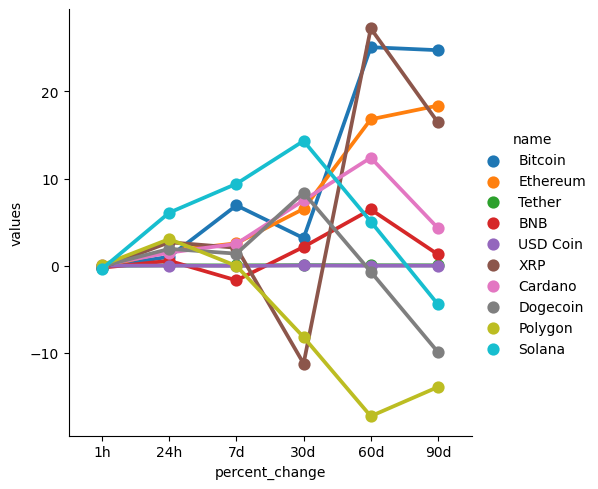

In [21]:
# Creating Line Plot Graph
sns.catplot(x='percent_change', y='values',hue='name',data=new_df, kind='point')

### Make Filter only for Bitcoin, Ethereum, Dogecoin and Solana

In [22]:
# Make Filter for data frame

filtered_df = new_df.query("name == 'Bitcoin' or name == 'Ethereum' or name == 'Dogecoin' or name == 'Solana'")
filtered_df

,name,percent_change,values
0,Bitcoin,1h,-0.130449
1,Bitcoin,24h,1.020017
2,Bitcoin,7d,6.917703
3,Bitcoin,30d,3.159996
4,Bitcoin,60d,25.062356
5,Bitcoin,90d,24.721551
6,Ethereum,1h,-0.149384
7,Ethereum,24h,1.694477
8,Ethereum,7d,2.569278
9,Ethereum,30d,6.519157


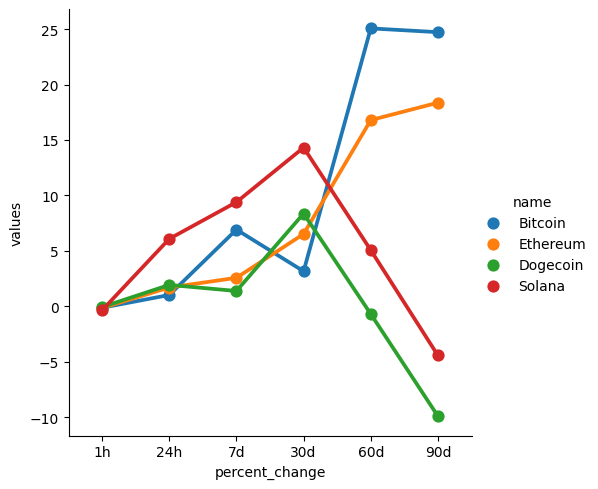

In [23]:
# Visualize filtered data frame

sns.catplot(x='percent_change', y='values',hue='name',data=filtered_df, kind='point')